## Problem statement

### Data Loading

In [386]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
import zipcodes
import missingno as msno
import plotly.express as px

In [387]:
# Set the session options
%matplotlib inline
pd.options.display.max_columns = None
#pd.options.display.max_rows = None
warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:,.2f}'.format

In [388]:
df = pd.read_csv('loan.csv',low_memory=False)

In [389]:
df.shape

(39717, 111)

In [390]:
df.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object

### Data Cleaning

In [391]:
## Remove all rows and columns those contains all null values
df = df.dropna(axis=0,how='all')
df = df.dropna(axis=1,how='all')

In [392]:
df.shape

(39717, 57)

In [393]:
##remove all columns having same value
loan_unique = df.nunique().sort_values()
unique_col = loan_unique[loan_unique==1].index
df.drop(unique_col,axis=1,inplace=True)

In [394]:
##remove columns having null values more than 30%
null_greater_30_per= df.isnull().sum()[df.isnull().sum()>=len(df)/3].index
df.drop(null_greater_30_per,axis=1,inplace=True)

In [395]:
df.shape

(39717, 45)

[]

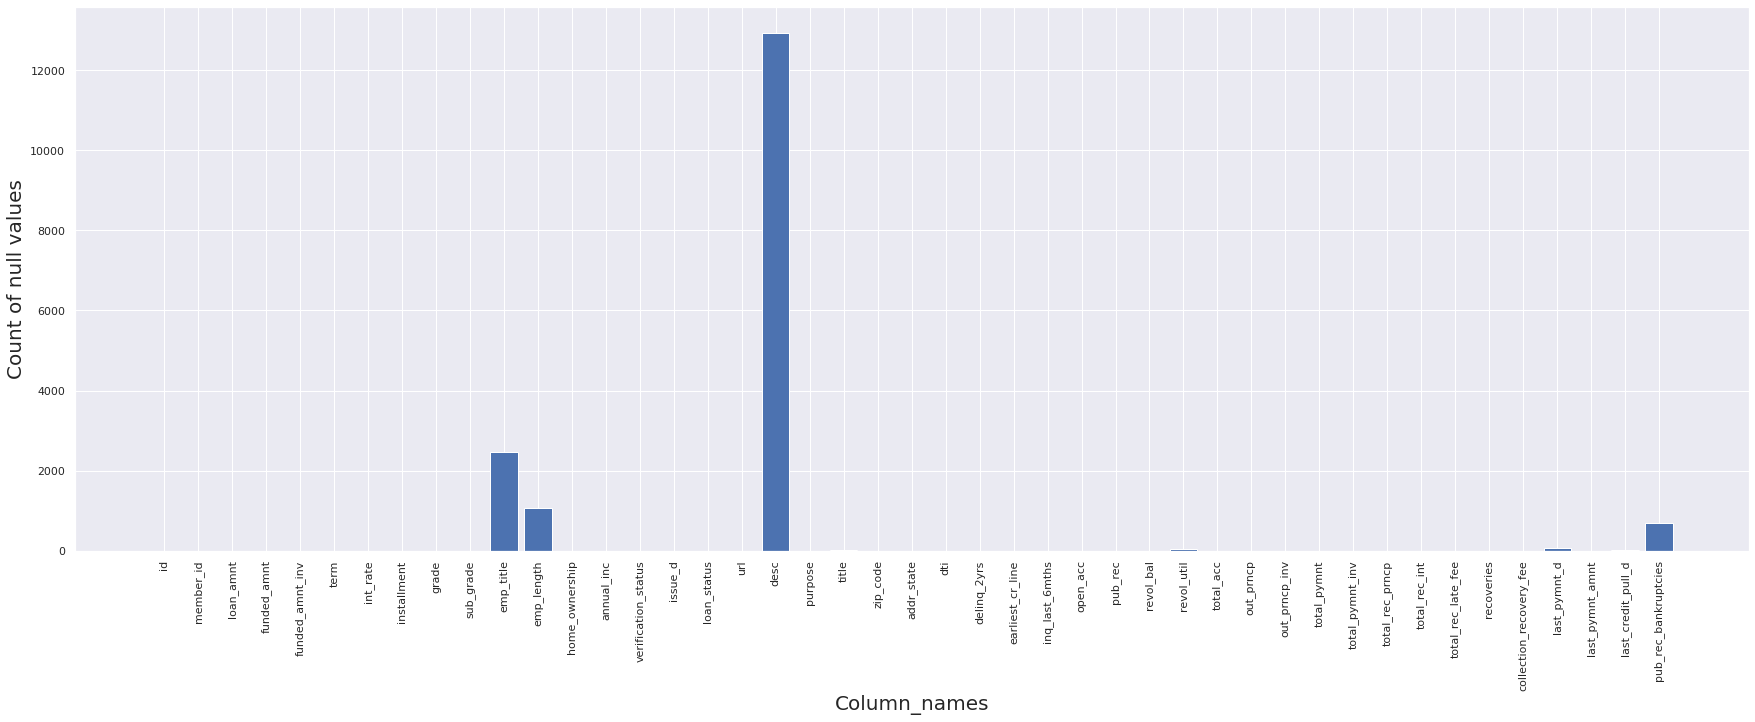

In [396]:
#distribution of missing values

plt.figure(figsize= (30,10))
plt.bar(df.isnull().sum().index,df.isnull().sum())
plt.xlabel("Column_names" ,fontdict={'fontsize':20})
plt.ylabel("Count of null values",fontdict={'fontsize':20})
plt.xticks(rotation=90)
plt.plot()

In [397]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies
count,"39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,020.00"
mean,"683,131.91","850,463.56","11,219.44","10,947.71","10,397.45",324.56,"68,968.93",13.32,0.15,0.87,9.29,0.06,"13,382.53",22.09,51.23,50.99,"12,153.60","11,567.15","9,793.35","2,263.66",1.36,95.22,12.41,"2,678.83",0.04
std,"210,694.13","265,678.31","7,456.67","7,187.24","7,128.45",208.87,"63,793.77",6.68,0.49,1.07,4.40,0.24,"15,885.02",11.40,375.17,373.82,"9,042.04","8,942.67","7,065.52","2,608.11",7.29,688.74,148.67,"4,447.14",0.20
min,"54,734.00","70,699.00",500.00,500.00,0.00,15.69,"4,000.00",0.00,0.00,0.00,2.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,"516,221.00","666,780.00","5,500.00","5,400.00","5,000.00",167.02,"40,404.00",8.17,0.00,0.00,6.00,0.00,"3,703.00",13.00,0.00,0.00,"5,576.93","5,112.31","4,600.00",662.18,0.00,0.00,0.00,218.68,0.00
50%,"665,665.00","850,812.00","10,000.00","9,600.00","8,975.00",280.22,"59,000.00",13.40,0.00,1.00,9.00,0.00,"8,850.00",20.00,0.00,0.00,"9,899.64","9,287.15","8,000.00","1,348.91",0.00,0.00,0.00,546.14,0.00
75%,"837,755.00","1,047,339.00","15,000.00","15,000.00","14,400.00",430.78,"82,300.00",18.60,0.00,1.00,12.00,0.00,"17,058.00",29.00,0.00,0.00,"16,534.43","15,798.81","13,653.26","2,833.40",0.00,0.00,0.00,"3,293.16",0.00
max,"1,077,501.00","1,314,167.00","35,000.00","35,000.00","35,000.00","1,305.19","6,000,000.00",29.99,11.00,8.00,44.00,4.00,"149,588.00",90.00,"6,311.47","6,307.37","58,563.68","58,563.68","35,000.02","23,563.68",180.20,"29,623.35","7,002.19","36,115.20",2.00


In [398]:
##check object datatypes and resolve them
df.dtypes[df.dtypes==object].index

Index(['term', 'int_rate', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state',
       'earliest_cr_line', 'revol_util', 'last_pymnt_d', 'last_credit_pull_d'],
      dtype='object')

In [399]:
##Remove month from term column

print("----------Term----------")
df["term"] = df["term"].str.replace(' months','').astype('int32')
print(df["term"].nunique())
print(df["term"].unique())

----------Term----------
2
[36 60]


In [400]:
##Remove % from int_rate (interest rate)

print("--------int_rate---------")
df["int_rate"] = df["int_rate"].str.replace('%','').astype(float)
print(df["int_rate"].nunique())

--------int_rate---------
371


In [401]:
##Grade will remain categorical
print("----------grade-----------")
print(df["grade"].unique())
print(df["grade"].nunique())


print("----------subgrade-----------")
print(df["sub_grade"].unique())
print(df["sub_grade"].nunique())

----------grade-----------
['B' 'C' 'A' 'E' 'F' 'D' 'G']
7
----------subgrade-----------
['B2' 'C4' 'C5' 'C1' 'B5' 'A4' 'E1' 'F2' 'C3' 'B1' 'D1' 'A1' 'B3' 'B4'
 'C2' 'D2' 'A3' 'A5' 'D5' 'A2' 'E4' 'D3' 'D4' 'F3' 'E3' 'F4' 'F1' 'E5'
 'G4' 'E2' 'G3' 'G2' 'G1' 'F5' 'G5']
35


In [402]:
##emp_length : employment duration
##0 for less than a year and 10 for 10 or more than 10 years
print("-----------emp_length------------")
df['emp_length'] = df['emp_length'].str.replace(' years|year|\+','')
df['emp_length'] = df['emp_length'].str.replace('< 1','0')
df["emp_length"].fillna('Not Disclosed',inplace=True)
print(df['emp_length'].unique())


-----------emp_length------------
['10' '0 ' '1 ' '3' '8' '9' '4' '5' '6' '2' '7' 'Not Disclosed']


In [403]:
##home_ownership
print('-----home ownership------')
print(df['home_ownership'].value_counts())
###removing None as there only 3 
df = df[~(df['home_ownership']=="NONE")]
print(df['home_ownership'].value_counts())


-----home ownership------
RENT        18899
MORTGAGE    17659
OWN          3058
OTHER          98
NONE            3
Name: home_ownership, dtype: int64
RENT        18899
MORTGAGE    17659
OWN          3058
OTHER          98
Name: home_ownership, dtype: int64


In [404]:
print("-------------issue_d-------------")
df['issue_d'] = pd.to_datetime(df['issue_d'],format='%b-%y')
df['issue_d'].describe()

-------------issue_d-------------


count                   39714
unique                     55
top       2011-12-01 00:00:00
freq                     2260
first     2007-06-01 00:00:00
last      2011-12-01 00:00:00
Name: issue_d, dtype: object

In [405]:
#last_pymnt_d: Last month payment was received
df["last_pymnt_d"] = pd.to_datetime(df["last_pymnt_d"],format='%b-%y')
df["last_pymnt_d"].describe()

count                   39643
unique                    101
top       2016-05-01 00:00:00
freq                     1256
first     2008-01-01 00:00:00
last      2016-05-01 00:00:00
Name: last_pymnt_d, dtype: object

In [406]:
#last_credit_pull_d: The most recent month LC pulled credit for this loan
df["last_credit_pull_d"] = pd.to_datetime(df["last_credit_pull_d"],format='%b-%y')
df["last_credit_pull_d"].describe()

count                   39712
unique                    106
top       2016-05-01 00:00:00
freq                    10308
first     2007-05-01 00:00:00
last      2016-05-01 00:00:00
Name: last_credit_pull_d, dtype: object

In [407]:
##target variable loan_status
print("--------loan---------")
df.groupby("loan_status").agg({'loan_status':'count'})

--------loan---------


,loan_status
loan_status,
Charged Off,5627
Current,1140
Fully Paid,32947


In [408]:
#url
#check for domain name, as domain name is same for all the raws so does not have extra info.
print("---------URL----------")
df['url'].apply(lambda x : x.split('/')[2]).value_counts()

---------URL----------


lendingclub.com    39714
Name: url, dtype: int64

In [409]:
#desc  : Loan Description provided by borrower
##create extra column for length of decription
df['desc'] = df['desc'].fillna('')
df['len_desc'] = df['desc'].apply(lambda x : len(x.strip()))
df['len_desc'].describe()


count   39,714.00
mean       286.44
std        423.01
min          0.00
25%          0.00
50%        143.00
75%        390.00
max      3,986.00
Name: len_desc, dtype: float64

In [410]:
df['earliest_cr_line_dt']=pd.to_datetime(df['earliest_cr_line'],format='%b-%y')
print(df['earliest_cr_line_dt'].min())
print(df['earliest_cr_line_dt'].max())


# earliest_cr_line: The month the borrower's earliest reported credit line was opened
df["earliest_cr_line"]= pd.to_datetime(df["earliest_cr_line"],format='%b-%y')
# Earliest credit line of 2068 doesn't make sense. This appears to be due to limitation in python. 
# Python datetime library can only read dates until 1968. 

df['earliest_cr_line_dt_fine']=df['earliest_cr_line_dt'].apply(lambda x :x.replace(year=x.year-100) if x.year > 2018 else x)
print(df['earliest_cr_line_dt_fine'].min())
print(df['earliest_cr_line_dt_fine'].max())
df["earliest_cr_line"].describe()

1969-02-01 00:00:00
2068-12-01 00:00:00
1946-01-01 00:00:00
2008-11-01 00:00:00


count                   39714
unique                    526
top       1998-11-01 00:00:00
freq                      370
first     1969-02-01 00:00:00
last      2068-12-01 00:00:00
Name: earliest_cr_line, dtype: object

In [411]:
# Take timedelta of issue_date_dt and earliest_cr_line_dt_fine to determin the 'credit Age/History of applicant'. 
# Calculate the credit History in terms of years
df['time_delta']=df['issue_d']-df['earliest_cr_line_dt_fine']
df['time_delta_int']=df['time_delta']/np.timedelta64(1, 'Y')
print(df['time_delta_int'].min())
print(df['time_delta_int'].max())

2.998008172652416
65.41407421096942


In [412]:
#revol_util: Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
df["revol_util"]=df["revol_util"].str.replace('%','').astype(float)

##fill null values with the median
df.dropna(subset=['revol_util'],inplace=True)


In [413]:
# emp_title - Create a new derived column to categorize if the emp_title is disclosed or not
df.emp_title.describe()
df['emp_title_provided'] = np.where(np.logical_or(df['emp_title'].isnull(), df['emp_title'].str.strip() == ''), False, True)
df['emp_title_provided'] = df['emp_title_provided'].apply(lambda x: 'Disclosed' if x is True else 'Not Disclosed')

In [414]:
#pub_rec_bankruptcies - Impute 'Not known' for the bankruptcies record where the data is not available. 
print('--- pub_rec_bankruptcies ----\n')
print(df.pub_rec_bankruptcies.unique())
df.pub_rec_bankruptcies.fillna(value='Not Known',inplace=True)
print(df.pub_rec_bankruptcies.unique())


--- pub_rec_bankruptcies ----

[ 0.  1.  2. nan]
[0.0 1.0 2.0 'Not Known']


In [415]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39664 entries, 0 to 39716
Data columns (total 51 columns):
 #   Column                    Non-Null Count  Dtype          
---  ------                    --------------  -----          
 0   id                        39664 non-null  int64          
 1   member_id                 39664 non-null  int64          
 2   loan_amnt                 39664 non-null  int64          
 3   funded_amnt               39664 non-null  int64          
 4   funded_amnt_inv           39664 non-null  float64        
 5   term                      39664 non-null  int32          
 6   int_rate                  39664 non-null  float64        
 7   installment               39664 non-null  float64        
 8   grade                     39664 non-null  object         
 9   sub_grade                 39664 non-null  object         
 10  emp_title                 37211 non-null  object         
 11  emp_length                39664 non-null  object         
 12  home

## Delete columns

In [416]:
#Drop columns that do not add any weight to the analysis
df.drop(columns=['member_id','funded_amnt_inv','grade','sub_grade','emp_title',\
                       'url','desc','open_acc','total_acc',\
                       'title',"zip_code",'earliest_cr_line',\
                       'earliest_cr_line_dt','time_delta','out_prncp','out_prncp_inv','total_pymnt',\
                       'total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee',\
                       'recoveries','collection_recovery_fee','last_pymnt_amnt',\
                        'last_credit_pull_d','earliest_cr_line_dt_fine',\
                       'last_pymnt_d'],
                        axis=1,inplace=True)

In [417]:
df.shape


(39664, 24)

<AxesSubplot:>

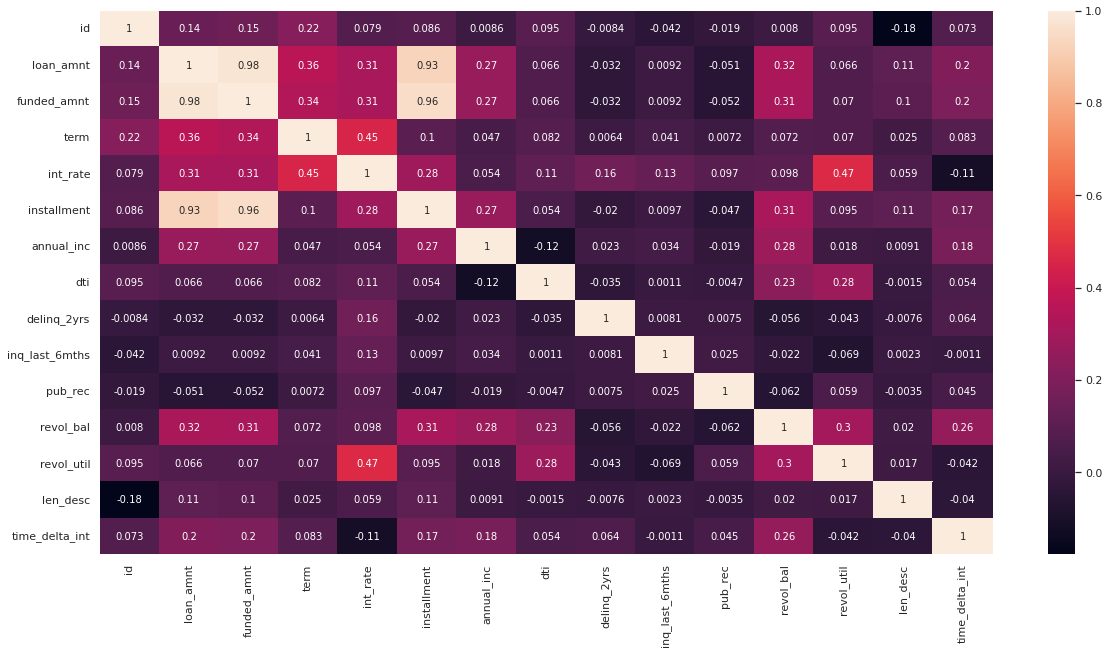

In [418]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

<Figure size 1440x1440 with 0 Axes>

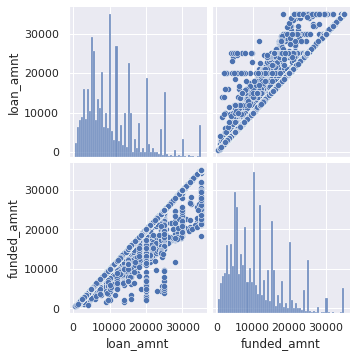

In [419]:
##from above heatmap we can see the correlated varibles
##funded amount, are corelated with each other
##lets check the kind co correation
plt.figure(figsize=(20,20))
sns.pairplot(df[["loan_amnt",'funded_amnt']])

In [420]:
# ##from above the plot we can see both are positively correlated with each other, 
#drop funded_amount
df = df.drop(["funded_amnt"],axis=1)

In [421]:
# Extract fully paid and charged off loans for Segmented analysis
loan_data_extract=df[df['loan_status']!='Current']
# Check Size and print few observations
print(loan_data_extract.shape)

(38524, 23)


<AxesSubplot:>

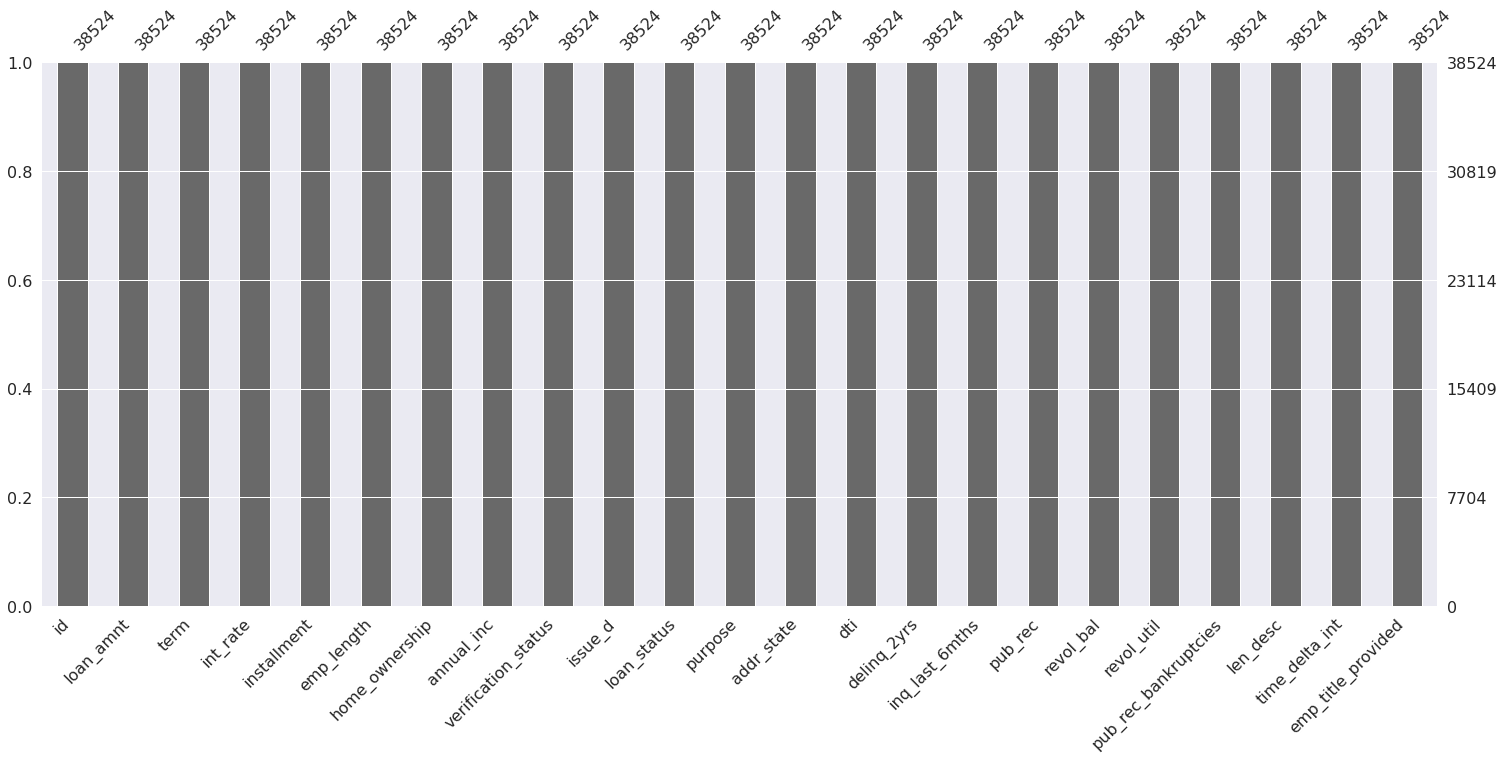

In [422]:
# Check the missing numbers
msno.bar(loan_data_extract)

### Univariate analysis

In [426]:
import seaborn as sns


def stack_plot(data,x=None,y="loan_status",width = 600, height = 500):
    data[x] = data[x].apply(lambda x: str(x))
    df_stack = data.groupby([x,y]).size().reset_index()
    df_stack['Percentage']=data.groupby([x,y]).size().groupby(level=0).apply(lambda x:100 * x/float(x.sum())).values

    df_stack['Percentage'] =  df_stack['Percentage'].apply(lambda x: round(x,2)) 
    fig = px.bar(df_stack, x = x, y = 'Percentage', color = y
        , barmode = 'stack',text=df_stack['Percentage'])
    fig.update_layout(title = x,
        xaxis_title = y, yaxis_title = 'Percentage', 
        width =width, height = height)
    fig.show()

def box_plot(data,x=None,y=None,fx=10,fy=8):
    
    fig=plt.figure(figsize=(fx, fy), dpi=70, facecolor='w', edgecolor='k')
    sns.set(style="darkgrid")
    sns.boxplot(x=x,y=y,data=data,orient="v",palette='pastel')
    plt.show()

def count_plot(data,columns,fx=16,fy=8):
    
    fig=plt.figure(figsize=(fx, fy), dpi=90, facecolor='w', edgecolor='k')
    sns.set(style="darkgrid")
    i=1
    for col in columns:
        plt.subplot(2,3,i)
        plt.xticks(rotation='vertical')
        ax=sns.countplot(y=col,
            data=data,
            palette='pastel',
            order=data[col].value_counts().index)  
        i=i+1
    
    
    plt.show()

##### Loan amount : The amount customer requested

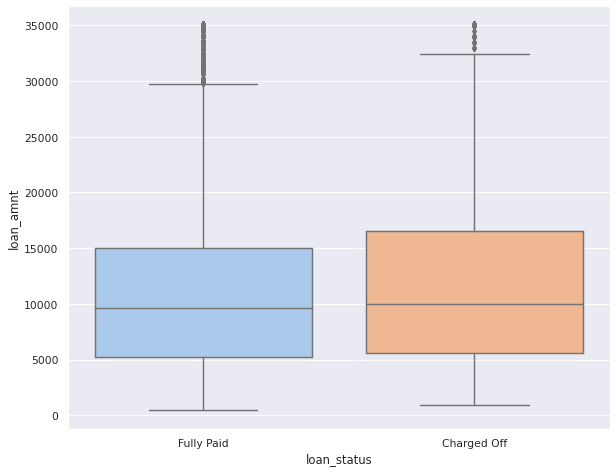

In [364]:
box_plot(data= loan_data_extract,y='loan_amnt',x='loan_status')

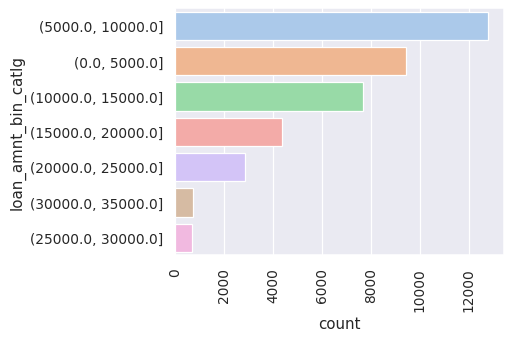

In [365]:
##bin the Loan amount in buckets to check counts in buckets
loan_data_extract['loan_amnt_bin_catlg'] = pd.cut(loan_data_extract['loan_amnt'], np.linspace(0, 35000, 8))
count_plot(loan_data_extract,['loan_amnt_bin_catlg'])

In [366]:
stack_plot(x='loan_amnt_bin_catlg',y='loan_status',data=loan_data_extract)

__OBSERVATION:__


In general, as the loan amount is increasing, the percentage of the charged off loans is increasing.

The percentage of Charged off loans is highest for the loan amounts in range 30000 - 35000. But, the number of   loans in this category are less.

From the count plot, the highest number of loans is for 5000 - 10000, followed by 0 - 5000 and 10000 - 15000. With in top 3 high volume categories, the laons that all with in 0 -5000 are slightly likely to be charged off

#### Term: term of loan

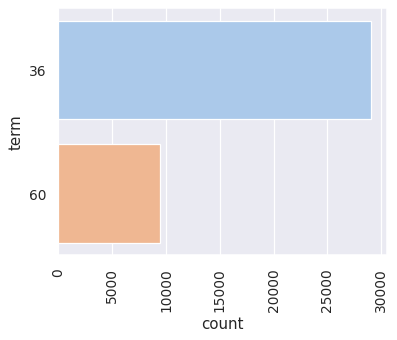

In [367]:
count_plot(loan_data_extract,['term'])

stack_plot(x='term',y='loan_status',data=loan_data_extract)

__Observation__:

Loans with longer tenure have high percentage of Charge Off applications. This indicates that customers who have longer commitments opted charge off due to varying financial circumstances over the time.

#### int_rate: Interest rate

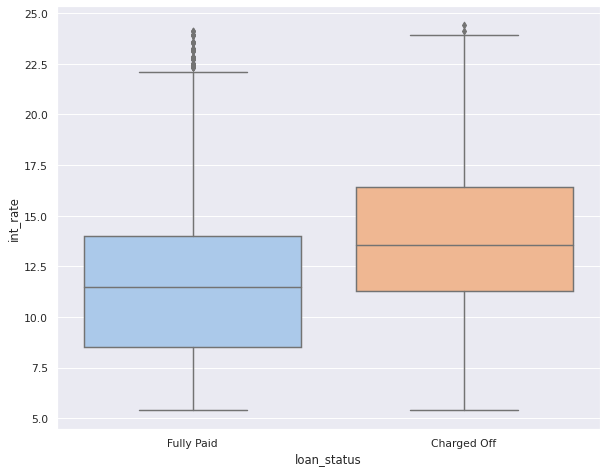

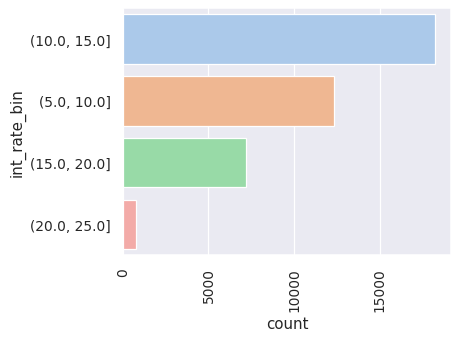

In [368]:
box_plot(data= loan_data_extract,y='int_rate',x='loan_status')
loan_data_extract['int_rate_bin'] = pd.cut(loan_data_extract['int_rate'], np.linspace(5, 25, 5))

count_plot(loan_data_extract,['int_rate_bin'])

stack_plot(x='int_rate_bin',y='loan_status',data=loan_data_extract)


__OBSERVATION:__

In general, the higher the interest rate is, the higher is the percentage of Charged off Loans.

Loans with in interest rate 10 -15 are most frequent, followed by those with 5-10 and 15-20.

However, the percentage of chareged Offs is high in 10-15, followed by 5-10.

This analysis evidences, that there is some risk in issuing the High Interest Loans and additional due deligence is required while processing loan applications

#### Installments

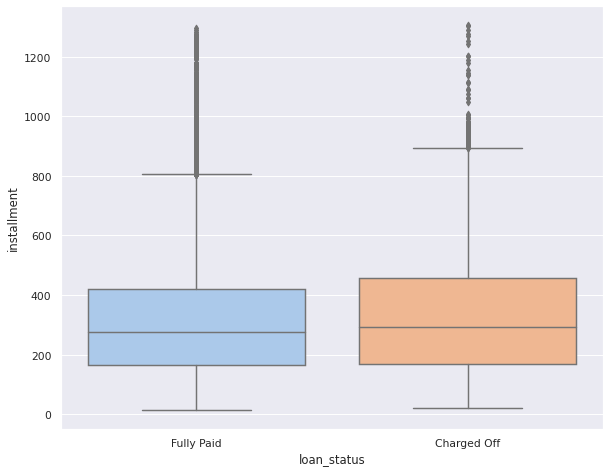

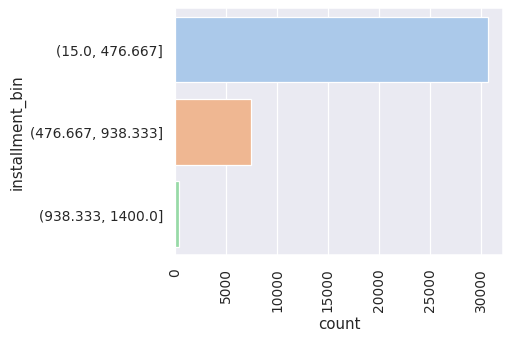

In [434]:
# loan_data_extract['installment'].describe()
box_plot(data= loan_data_extract,y='installment',x='loan_status')
loan_data_extract['installment_bin'] = pd.cut(loan_data_extract['installment'], np.linspace(15, 1400, 4))

count_plot(loan_data_extract,['installment_bin'])

stack_plot(x='installment_bin',y='loan_status',data=loan_data_extract)

__OBSERVATION:__




#### emp_length: tenure of employee

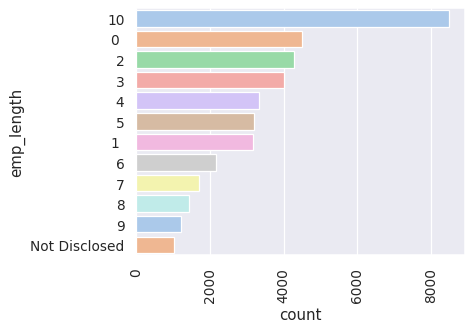

In [370]:
#box_plot(data= loan_data_extract,y='emp_length',x='loan_status')
#loan_data_extract['int_rate_bin'] = pd.cut(loan_data_extract['int_rate'], np.linspace(5, 25, 5))

count_plot(loan_data_extract,['emp_length'])

stack_plot(x='emp_length',y='loan_status',data=loan_data_extract)

__OBSERVATION__:

There is no clear trend of employment length impact on the charged off rate. Further investigation will be required to study this variable

#### home_ownership: type of home ownership rented, own or mortgage

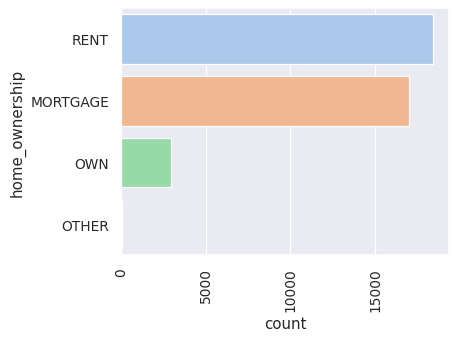

In [371]:
count_plot(loan_data_extract,['home_ownership'])

stack_plot(x='home_ownership',y='loan_status',data=loan_data_extract)

__Observation:__

The home ownership with 'other' are charging off the loans at higher rate.

This shows that 'other' category of the home ownership should be identified as risk. Further checks are required to understand
the residency status.

#### annual_inc: Annual income

In [372]:
loan_data_extract["annual_inc"].describe()

count      38,524.00
mean       68,808.30
std        64,216.26
min         4,000.00
25%        40,000.00
50%        59,000.00
75%        82,000.00
max     6,000,000.00
Name: annual_inc, dtype: float64

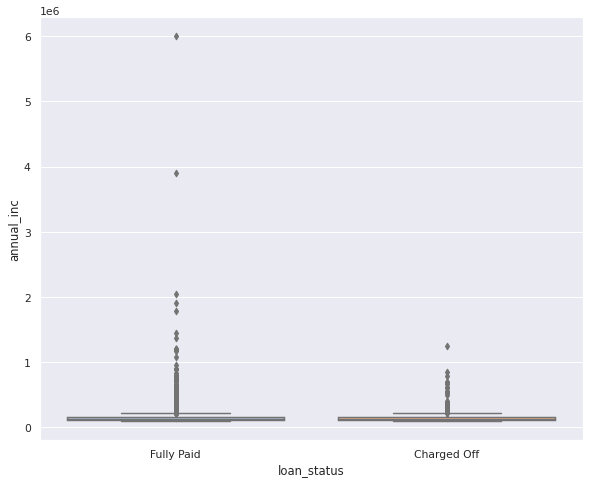

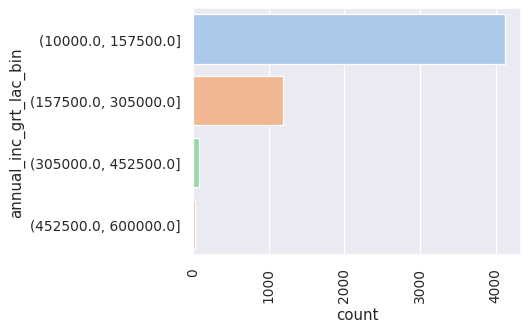

In [373]:
##let's do analysis for slaray more than 1 Lac seprately
salary_grt_lakh= loan_data_extract[loan_data_extract["annual_inc"]>100000]
box_plot(data= salary_grt_lakh,y='annual_inc',x='loan_status')
salary_grt_lakh['annual_inc_grt_lac_bin'] = pd.cut(salary_grt_lakh['annual_inc'], np.linspace(10000,600000,5))

count_plot(salary_grt_lakh,['annual_inc_grt_lac_bin'])

stack_plot(x='annual_inc_grt_lac_bin',y='loan_status',data=salary_grt_lakh)

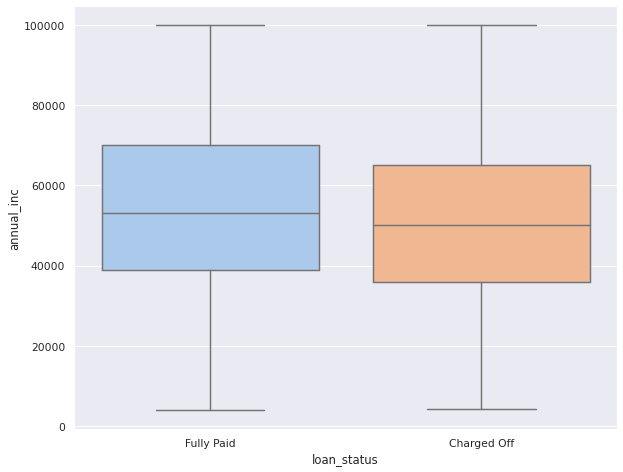

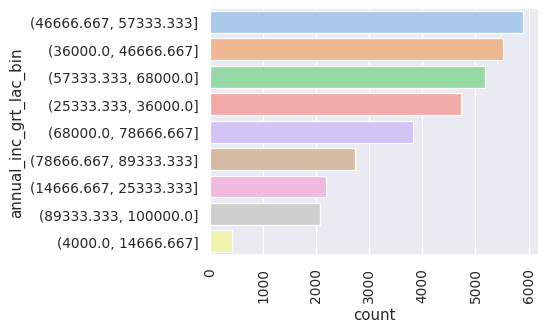

In [374]:
##let's do analysis for slaray more than 1 Lac seprately
salary_less_lakh= loan_data_extract[loan_data_extract["annual_inc"]<100000]
box_plot(data= salary_less_lakh,y='annual_inc',x='loan_status')
salary_less_lakh['annual_inc_grt_lac_bin'] = pd.cut(salary_less_lakh['annual_inc'], np.linspace(4000,100000,10))

count_plot(salary_less_lakh,['annual_inc_grt_lac_bin'])

stack_plot(x='annual_inc_grt_lac_bin',y='loan_status',data=salary_less_lakh)

__OBSERVATION:__

Employee greater than 1 Lac salary:

    we can see that employees with greater than 1L rang, those are getting heigher salary in range 4.5L t0 6.0L are more likely to chargedoff



Employee less than 1 Lac salary:

    we can see that employees with greater than 1L rang, those are getting lower salary salary in range 4k t0 15k are more likely to chargedoff





##### verification_status: Indicates if income was verified by LC, not verified, or if the income source was verified

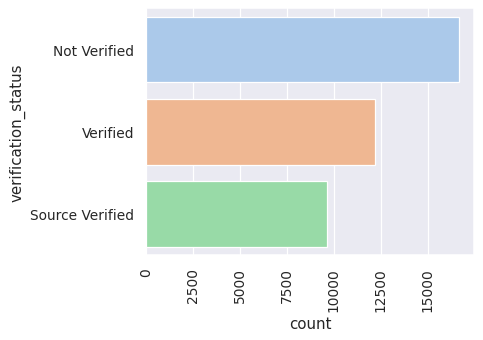

In [375]:
#loan_data_extract["verification_status"]

count_plot(loan_data_extract,['verification_status'])
stack_plot(x='verification_status',y='loan_status',data=loan_data_extract)

__OBSERVATION__:


In case of Income verification, the charge off rate is higher ,when the income has been verified.

This shows, that income verification checks have no effect in case of Risky applications. The income verification process will need to be reviewed.

#### emp_title_provided and Decription_length

---------------------------------------------Decription_length------------------------------------------------


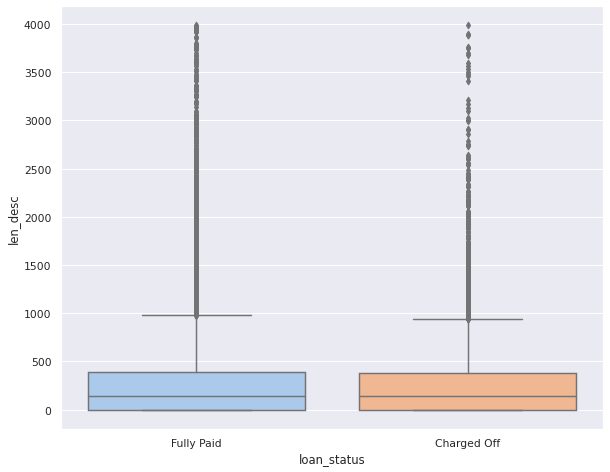

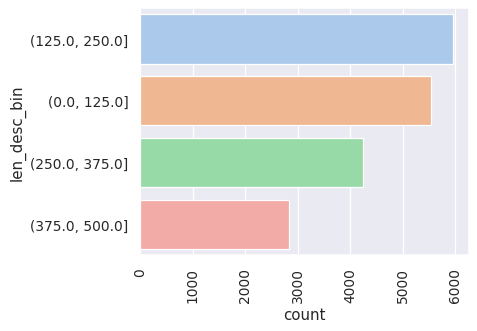

-----------------------------------------------emp_title_provided------------------------------------------------


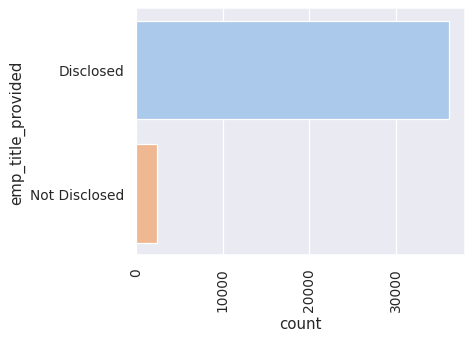

In [376]:
# emp_title_provided
# Decription_length
print("---------------------------------------------Decription_length------------------------------------------------")
box_plot(data= loan_data_extract,y='len_desc',x='loan_status')
loan_data_extract['len_desc_bin'] = pd.cut(loan_data_extract['len_desc'], np.linspace(0, 500,5))

count_plot(loan_data_extract,['len_desc_bin'])

stack_plot(x='len_desc_bin',y='loan_status',data=loan_data_extract)


print("-----------------------------------------------emp_title_provided------------------------------------------------")
count_plot(loan_data_extract,['emp_title_provided'])

stack_plot(x='emp_title_provided',y='loan_status',data=loan_data_extract)

__OBSERVATION__:

Apparently, the rate of charged off applications are higher in cases, where the Employee title was not disclosed.

However, the 'Not Disclosed' is much less compared to 'Disclosed' category and that could have some bearing on this trend.
Further Analysis will be required on Employee title to draw logical conclusions.

#### Purpose

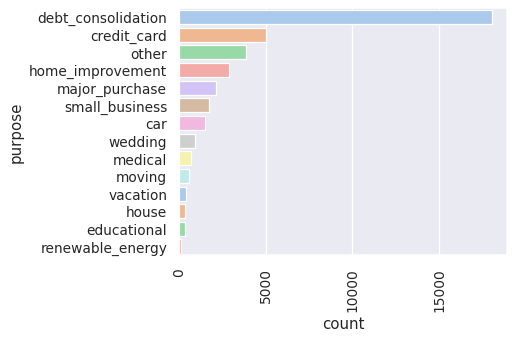

In [384]:
count_plot(loan_data_extract,['purpose'])

stack_plot(x='purpose',y='loan_status',data=loan_data_extract)

__Observation:__

In general, the unsecured loans - like the small business loans, followed by educational loans are highly charged off.
Debit Consolidation is the most common purpose

#### Analyse Credit History - The difference in the issue date and earliest credit date


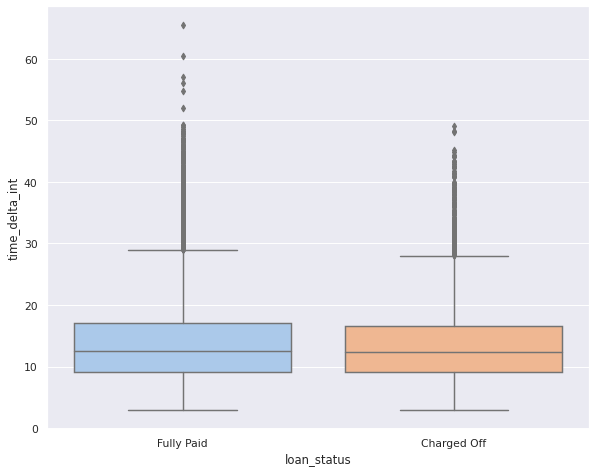

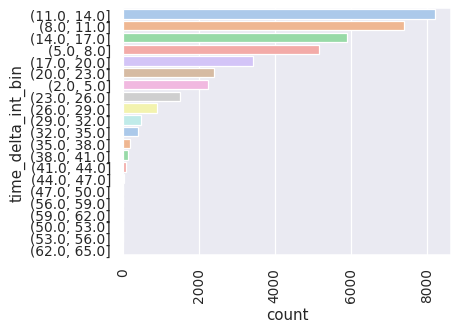

In [377]:
box_plot(data= loan_data_extract,y='time_delta_int',x='loan_status')
loan_data_extract['time_delta_int_bin'] = pd.cut(loan_data_extract['time_delta_int'], np.linspace(2, 65,22))

count_plot(loan_data_extract,['time_delta_int_bin'])

stack_plot(x='time_delta_int_bin',y='loan_status',data=loan_data_extract)


__Observations__:

There is a mixed trend in the charged off loans when plotted against the credit age.

In general, a very low credit age meant, the financial profile of the applicant is not clear.

A high credit age meant, the financial profile of the applicant is superseded by the age of the application.

This trend is clearly visible in the above percentage stacked plot.

#### inq_last_6mths

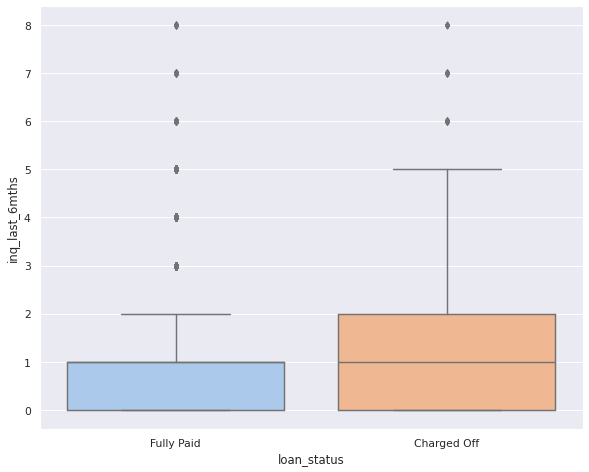

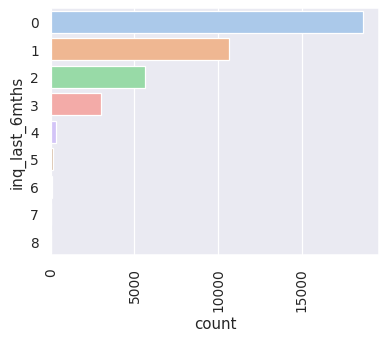

In [379]:
box_plot(data= loan_data_extract,y='inq_last_6mths',x='loan_status')
#loan_data_extract['inq_last_6mths_bin'] = pd.cut(loan_data_extract['inq_last_6mths'], np.linspace(0, 11,3))

count_plot(loan_data_extract,['inq_last_6mths'])

stack_plot(x='inq_last_6mths',y='loan_status',data=loan_data_extract)

__OBSERVATION:__

Considering both the count plot and stacked percentage plot, it is evident that, the higher the number of inquiries, the higher
is the rate of charge off. This parameter shows the desperation of the customer for a credit line.

#### pub_rec_bankruptcies: Number of public record bankruptcies

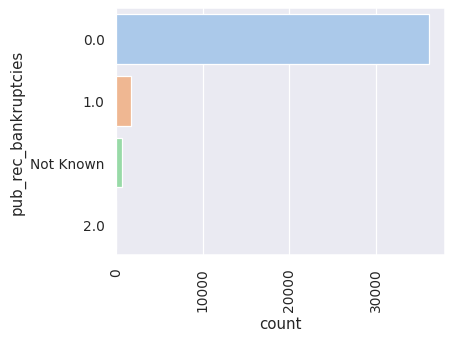

In [380]:
# box_plot(data= loan_data_extract,y='pub_rec',x='loan_status')
#loan_data_extract['inq_last_6mths_bin'] = pd.cut(loan_data_extract['inq_last_6mths'], np.linspace(0, 11,3))

count_plot(loan_data_extract,['pub_rec_bankruptcies'])

stack_plot(x='pub_rec_bankruptcies',y='loan_status',data=loan_data_extract)

__OBSERVATION:__

It is evident from the above chart that, the higher the bankruptcies are, the higher is the charge off rate.

#### revol_bal : Total credit revolving balance

In [381]:
loan_data_extract["revol_bal"].describe()

count    38,524.00
mean     13,305.95
std      15,869.16
min           0.00
25%       3,667.00
50%       8,777.00
75%      16,930.25
max     149,588.00
Name: revol_bal, dtype: float64

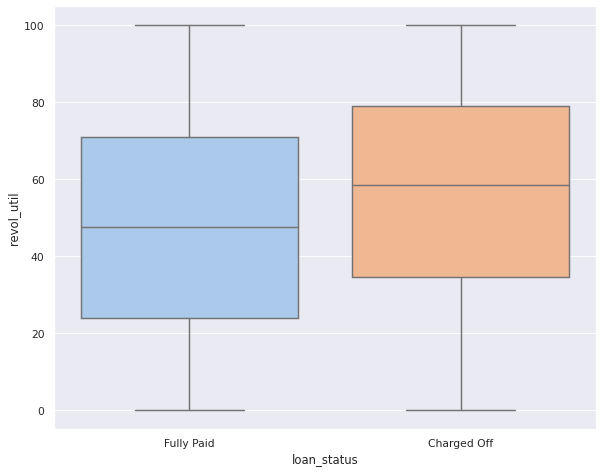

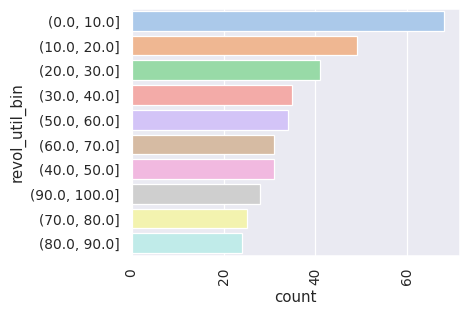

In [383]:
box_plot(data= loan_data_extract,y='revol_util',x='loan_status')
loan_data_extract['revol_util_bin'] = pd.cut(loan_data_extract['revol_bal'], np.linspace(0, 100,11))

count_plot(loan_data_extract,['revol_util_bin'])

stack_plot(x='revol_util_bin',y='loan_status',data=loan_data_extract)

__observation__:

There is no clear evidance of revolving balance on charged off rates

#### addr_state

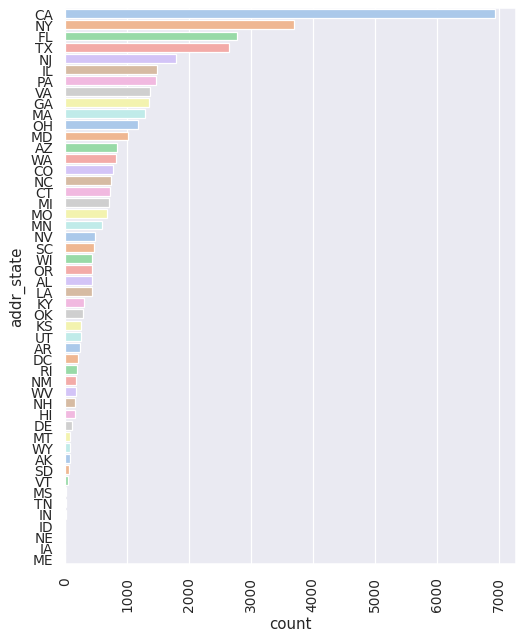

In [429]:
#box_plot(data= loan_data_extract,y='addr_state',x='loan_status')
#loan_data_extract['inq_last_6mths_bin'] = pd.cut(loan_data_extract['inq_last_6mths'], np.linspace(0, 11,3))

count_plot(loan_data_extract,['addr_state'],22,18)

stack_plot(x='addr_state',y='loan_status',data=loan_data_extract,width=1000,height=500)

__OBSERVATION:__

As per the above state 'CA' has highest number of charged off applications.

In terms of percentages, the loans are highly charged off in the state NE,NIU and AE.

Observing the number of loans applied from each of these states, it is clear, that the number of applications are less and hence

this behavior. Excluding the above outlier behavior, the state with highest charged off percentage is NV - Nevada.

#### delinq_2yrs : The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years

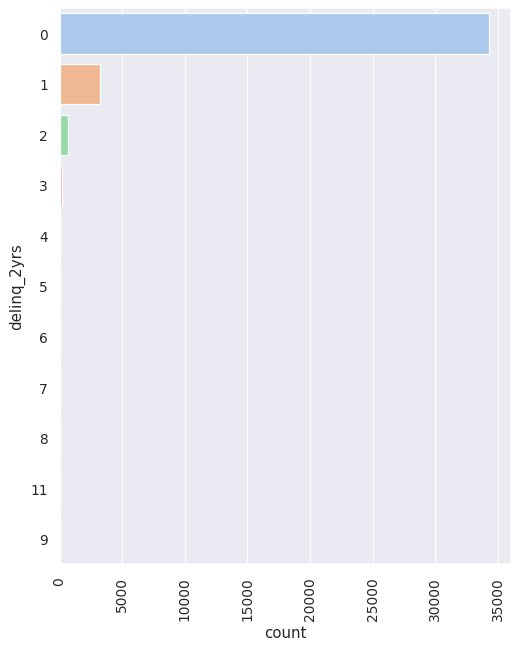

In [433]:
count_plot(loan_data_extract,['delinq_2yrs'],22,18)

stack_plot(x='delinq_2yrs',y='loan_status',data=loan_data_extract,width=1000,height=500)

__Observation__

In general, LC is not accepting the customers with higher count of 'delinq_2years'.

('delinq_2years' - Denotes how many 30+ days past with the incidences of delinquency in last 2 years)
The general trend is, as the count of variable increases, the percentage of charged off loans increases.

There is a definite chance of charging off loan when the delinq_2years is high. Additional checks are required to understand

the financial profile of the applicant in such cases.

### Bivariate Analysis